<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/E_Signing_of_Customers_on_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Data Preprocessing

Dataset link : https://www.kaggle.com/datasets/aniruddhachoudhury/esigning-of-loan-based-on-financial-history

## Importing the libraries and the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/financial_data.csv')

## Data exploration

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.shape

(17908, 21)

In [5]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [7]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## Dealing with null values

In [8]:
dataset.isnull().values.any()

False

In [9]:
dataset.isnull().values.sum()

0

## Encoding categorical data

In [10]:
dataset.select_dtypes(include='object').columns

Index(['pay_schedule'], dtype='object')

In [11]:
len(dataset.select_dtypes(include='object').columns)

1

In [12]:
dataset['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [13]:
dataset['pay_schedule'].nunique()

4

In [14]:
dataset.shape

(17908, 21)

In [15]:
dataset = pd.get_dummies(data=dataset, drop_first=True, dtype=int)

In [16]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [17]:
dataset.shape

(17908, 23)

In [18]:
len(dataset.select_dtypes(include='object').columns)

0

## Countplot

<Axes: xlabel='e_signed', ylabel='count'>

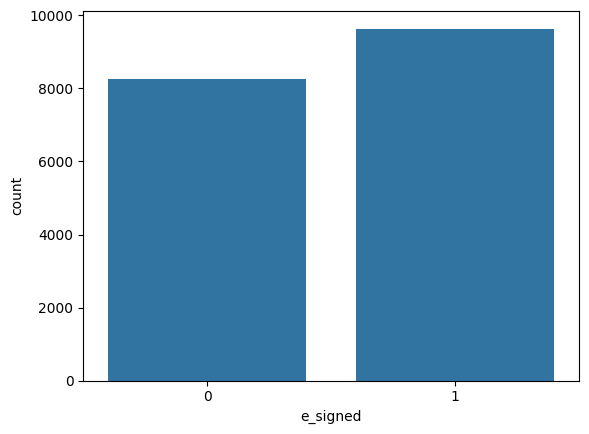

In [19]:
sns.countplot(x=dataset['e_signed'].astype('category'))

In [20]:
# e-signed values
(dataset.e_signed == 1).sum()

9639

In [21]:
# not e-signed values
(dataset.e_signed == 0).sum()

8269

## Restructure the dataset

In [22]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [23]:
dataset['months employed'] = (dataset.months_employed + dataset.years_employed * 12)

In [24]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [25]:
dataset = dataset.drop(columns=['months_employed', 'years_employed'])

In [26]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [27]:
dataset['personal account months'] = (dataset.personal_account_m + dataset.personal_account_y * 12)

In [28]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account months
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [29]:
dataset = dataset.drop(columns=['personal_account_m', 'personal_account_y'])

In [30]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


## Correlation matrix and heatmap

In [31]:
dataset_2 = dataset.drop(columns=['entry_id','e_signed'])

<Axes: title={'center': 'Correlated with e_signed'}>

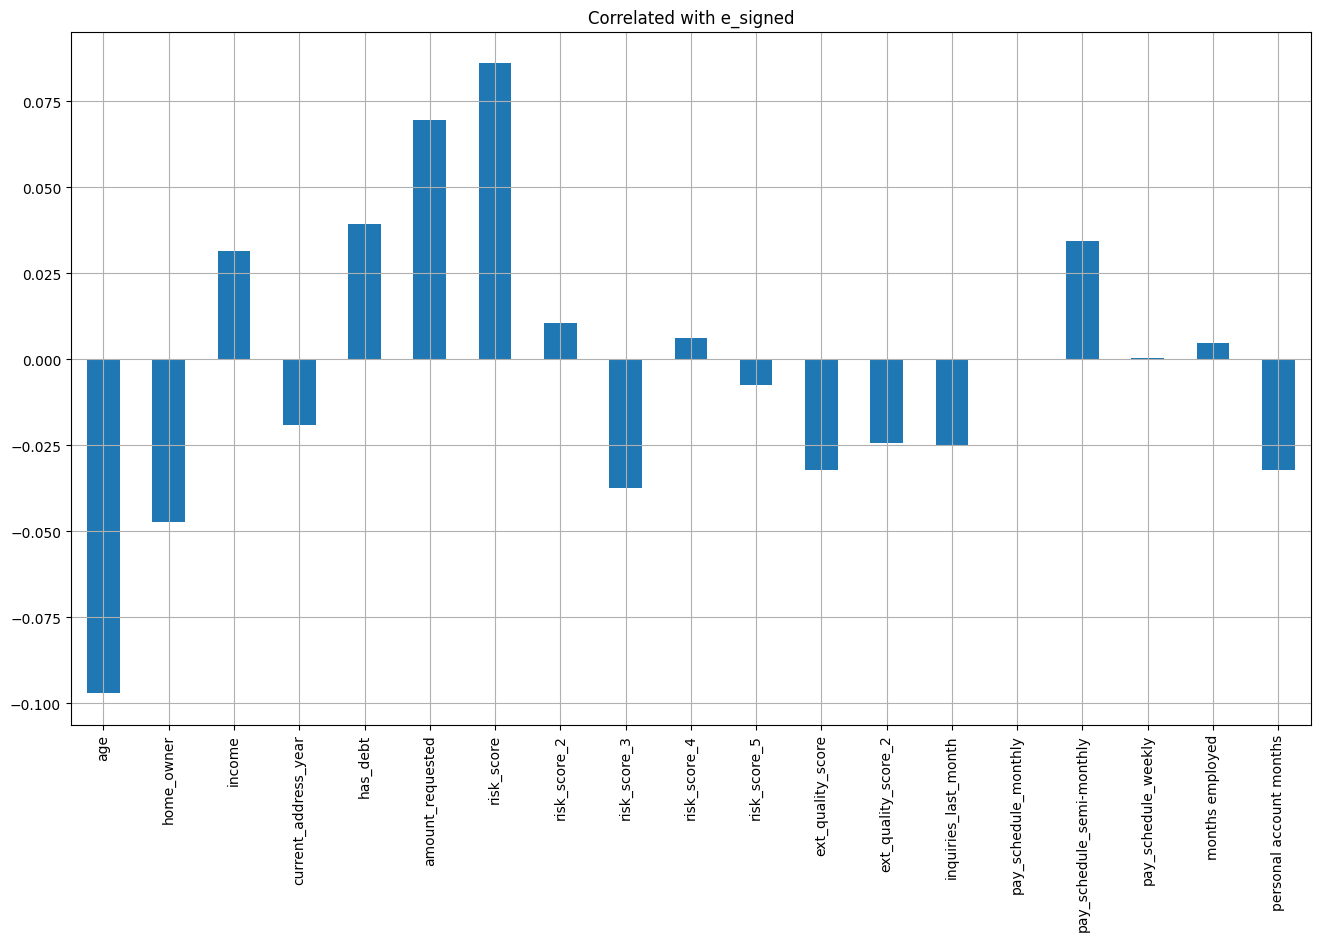

In [32]:
dataset_2.corrwith(dataset['e_signed']).plot.bar(figsize=(16,9), title= 'Correlated with e_signed',grid = True)

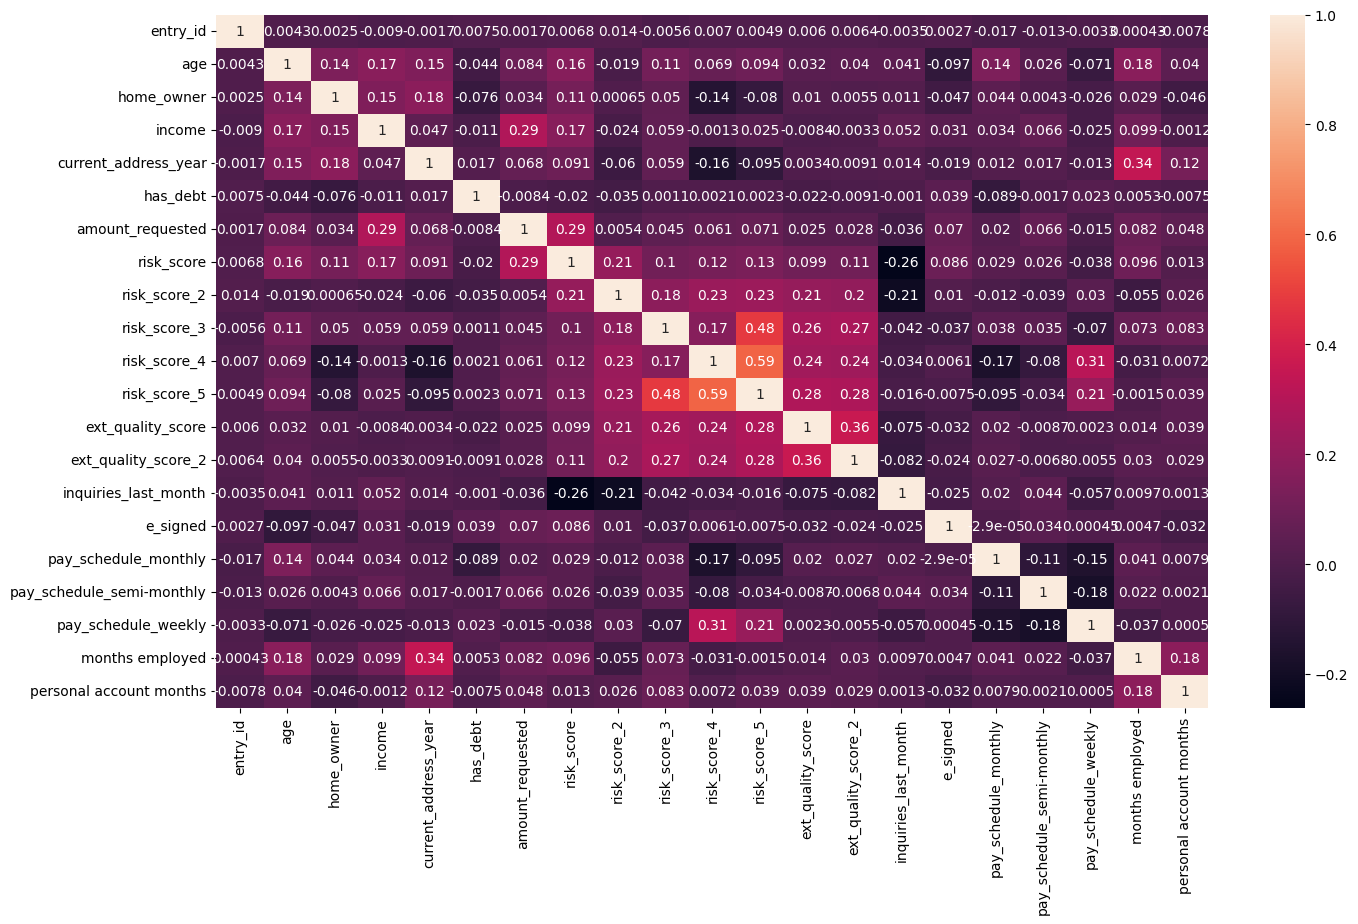

In [33]:
# heatmap
plt.figure(figsize = (16,9))
ax= sns.heatmap(dataset.corr(), annot=True)

## Splitting the dataset

In [34]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [35]:
# independent variables / matrix of features
x = dataset.drop(columns = ['entry_id','e_signed'])

In [36]:
# target variable / dependent variable
y = dataset['e_signed']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [38]:
x_train.shape

(14326, 19)

In [39]:
x_test.shape

(3582, 19)

In [40]:
y_train.shape

(14326,)

In [41]:
y_test.shape

(3582,)

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [43]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
x_train

array([[-0.00599126, -0.85634884, -0.24235846, ...,  1.97682704,
        -1.4077639 ,  0.36896493],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.50586115,
         0.35212263, -0.28090617],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.50586115,
        -1.18309754,  0.19566597],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.50586115,
        -0.65887602, -1.45067413],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.50586115,
         2.41156432,  3.83494409],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.50586115,
         0.35212263, -1.27737518]])

In [45]:
x_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.50586115,
        -1.18309754, -0.32423091],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.50586115,
        -0.28443207,  0.19566597],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.50586115,
         2.86089705, -0.84412778],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.50586115,
         1.06356612,  0.36896493],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.50586115,
         0.61423339,  0.19566597],
       [-0.08997442, -0.85634884, -0.72176785, ...,  1.97682704,
        -0.28443207,  1.75535659]])

# Part 2: Building the model

## 1)Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [47]:
y_pred = classifier_lr.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [49]:
accuracy_score(y_test, y_pred)

0.5628140703517588

In [50]:
confusion_matrix(y_test, y_pred)

array([[ 654, 1000],
       [ 566, 1362]])

## 2) SVM

In [51]:
from sklearn.svm import SVC # support vector classification
classifier_svc = SVC(random_state=0)
classifier_svc.fit(x_train, y_train)

SVC(random_state=0)

In [52]:
y_pred = classifier_svc.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.5946398659966499

In [54]:
confusion_matrix(y_test, y_pred) # the correct predictions are on the main diagonal, the incorrect one are on the secondary one

array([[ 797,  857],
       [ 595, 1333]])

## 3) Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [56]:
y_pred = classifier_rf.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.6323283082077052

In [58]:
confusion_matrix(y_test, y_pred)

array([[ 959,  695],
       [ 622, 1306]])

## 4) XGBoost Classifier

In [59]:
!pip install xgboost==2.0.3 scikit-learn==1.3.1


In [64]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [65]:
y_pred = classifier_xgb.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)


0.6303740926856505

In [63]:
confusion_matrix(y_test, y_pred)

array([[ 932,  722],
       [ 602, 1326]])

# Part 3: Aplying Randomized search to find the best parameters

In [95]:
parameters = {
    'learning_rate': [ 0.05,0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth' : [ 3 ,4, 5, 6, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma' : [0.00, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5,  0.7],
    'n_estimators' : [100, 200, 500],
    'subsample' : [0.5, 0.7, 1.0]

}

In [96]:
parameters

{'learning_rate': [0.05, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'n_estimators': [100, 200, 500],
 'subsample': [0.5, 0.7, 1.0]}

In [97]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameters,n_iter=5, scoring = 'roc_auc', n_jobs=-1,cv=5, verbose=3)

In [98]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.05, 0.1, 0.15,
                                                          0.2, 0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 10, 12, 15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=3)

In [99]:
random_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [100]:
random_cv.best_params_

{'subsample': 1.0,
 'n_estimators': 500,
 'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [101]:
random_cv.best_score_

0.700469108506134

# Part 4: Final model (XGBoost Classifier)

In [102]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [103]:
y_pred = classifier.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.6331658291457286

In [105]:
confusion_matrix(y_test, y_pred)

array([[ 935,  719],
       [ 595, 1333]])

# Part 5: Predicting a single observation

In [106]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [112]:
single_obs = [[45, 1, 2500, 3, 1, 600, 37000, 0.7373, 0.9035, 0.4877, 0.515977, 0.580918, 0.380918, 10, 0, 0, 0, 36 , 30]]

In [113]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])